MNIST Handwritten Digit Classification using Deep Learning (Neural Network)

**Importing the Dependencies**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST from keras.datasets

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training  data = 60,000 images

Test data = 10,000 images

Image dimensions = 28x28 pixels

Grayscale image = 1 channel, 3 channels for RGB images

In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


3


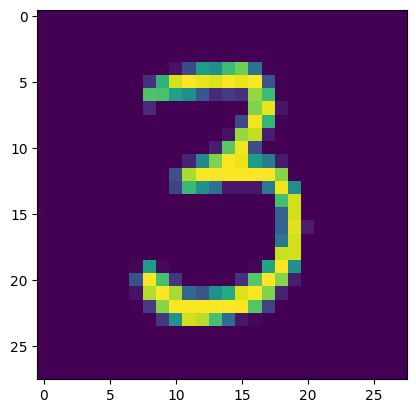

In [ ]:
#displaying the image
plt.imshow(x_train[50])
plt.show

#print the corresponding label
print(y_train[50])


Image Labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#unqiue values in y_train
print(np.unique(y_train))

#unqiue values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#normalizing/scaling the values
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [ ]:
#setting up the layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(50,activation='relu'), #first hidden layer
    keras.layers.Dense(50,activation='relu'), #second hidden layer
    keras.layers.Dense(10,activation='sigmoid') #output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network

model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8493 - loss: 0.5242
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9556 - loss: 0.1538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9665 - loss: 0.1097
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9751 - loss: 0.0845
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9801 - loss: 0.0691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0493
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0426
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0371
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0321


Training data accuracy = 99.04%

**Accuracy on Test Data:**

In [ ]:
loss,accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9697 - loss: 0.1257
0.9718000292778015


Test data accuracy = 97.18%

In [ ]:
print(x_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

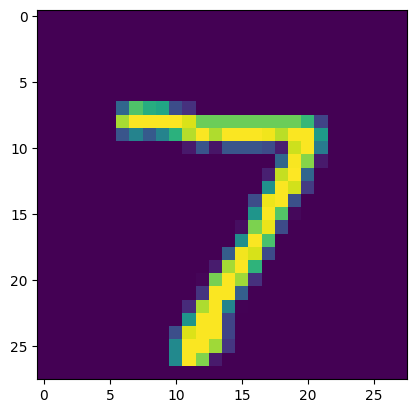

In [ ]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[3.1737322e-03 2.6793168e-05 3.6834127e-01 9.3234318e-01 1.2792273e-06
 2.1635347e-05 8.7283323e-12 9.9998623e-01 8.0844611e-01 9.6366596e-01]


In [ ]:
#converting the prediction probabilities to class label

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [ ]:
#converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y-test ---> True labels

y_pred_labels ---> Predicted Labels

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 958    0    2    2    2    3    2    1    1    9]
 [   0 1116    3    2    1    1    5    1    6    0]
 [   6    1 1005    2    5    0    3    6    4    0]
 [   1    0    6  972    1    3    0    9    5   13]
 [   0    0    2    0  966    0    7    2    2    3]
 [   1    0    0   12    2  859    6    1    6    5]
 [   1    1    0    1    6    3  946    0    0    0]
 [   1    1    7    2    2    0    0  990    2   23]
 [   4    0    3    8    6    5    6    4  929    9]
 [   0    2    0    5   20    1    1    3    2  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

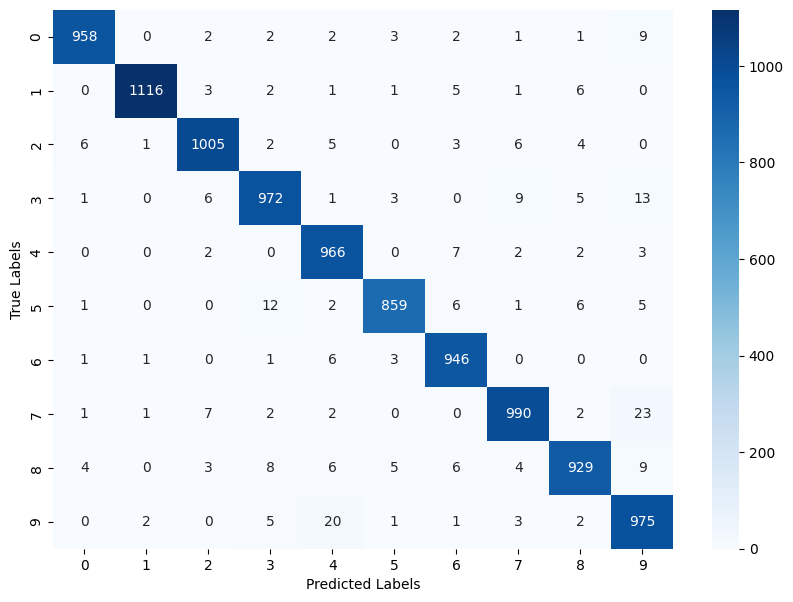

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [ ]:
input_image_path = '/content/image (1).jpg'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
cv2_imshow(input_image)

In [ ]:
print(input_image.shape)

(28, 28, 3)


In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(28, 28)

In [ ]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [ ]:
print(input_image_resize.shape)

(28, 28)


In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
iir = input_image_resize/255

In [ ]:
iir_reshaped = np.reshape(iir, [1,28,28])

In [ ]:
input_pred = model.predict(iir_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[2.0923315e-08 3.4844403e-03 1.0696313e-03 1.0000000e+00 1.1233930e-08
  5.5525917e-01 2.9382638e-13 5.9045774e-01 7.5857800e-01 4.3592560e-01]]


In [ ]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

3


***Predictive System***

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))
iir = input_image_resize/255
iir_reshaped = np.reshape(iir, [1,28,28])
input_pred = model.predict(iir_reshaped)
input_pred_label = np.argmax(input_pred)
print('The Handwritten Digit is Recognized as: ',input_pred_label)

Path of the image to be predicted: /content/Untitled.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The Handwritten Digit is Recognized as:  3
